In [2]:
def setup_model():
    import importlib
    import coc131_cw
    importlib.reload(coc131_cw)
    import matplotlib.pyplot as plt
    import numpy as np


    from coc131_cw import COC131
    model = COC131()
    model.q1()
    return model


In [16]:
def plot_pixel_distribution_comparison(original_array, standardized_array, index=0):
    """
    Q2: Plots histograms and box plots comparing the pixel value distribution of a single image
    before and after standardization.

    Parameters:
    - original_array: np.ndarray, original image data (model.x)
    - standardized_array: np.ndarray, standardized image data (from q2)
    - index: int, the index of the image to visualize
    """
    import matplotlib.pyplot as plt
    import numpy as np

    original = original_array[index]
    standardized = standardized_array[index]

    orig_flat = np.array(original.flatten())
    std_flat = np.array(standardized.flatten())

    # Sanity check
    print("Original mean/std:", np.mean(orig_flat), np.std(orig_flat))
    print("Standardized mean/std:", np.mean(std_flat), np.std(std_flat))

    # --- Histogram comparison ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].hist(orig_flat, bins=50, color='skyblue', edgecolor='black')
    axes[0].set_title("Original Image Pixel Distribution")
    axes[0].set_xlabel("Pixel Value")
    axes[0].set_ylabel("Frequency")

    axes[1].hist(std_flat, bins=50, color='salmon', edgecolor='black')
    axes[1].set_title("Standardized Image Pixel Distribution")
    axes[1].set_xlabel("Pixel Value (after standardization)")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

In [17]:
def q2_plot_featurewise_boxplots(original_array, standardized_array, num_features_to_plot=30, random_seed=42):
    """
    Plot boxplots for a subset of features before and after standardization.

    Parameters:
    - original_array: np.ndarray, original dataset (n_samples, ..., ...)
    - standardized_array: np.ndarray, standardized dataset, same shape
    - num_features_to_plot: int, number of features to sample and plot
    - random_seed: int, for reproducible feature sampling
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Flatten the data if it’s multidimensional (e.g., images)
    n_samples = original_array.shape[0]
    n_features = np.prod(original_array.shape[1:])
    original_flat = original_array.reshape(n_samples, n_features)
    standardized_flat = standardized_array.reshape(n_samples, n_features)

    # Sample feature indices to plot
    np.random.seed(random_seed)
    sampled_indices = np.random.choice(n_features, size=num_features_to_plot, replace=False)

    # Get sampled data
    original_sampled = original_flat[:, sampled_indices]
    standardized_sampled = standardized_flat[:, sampled_indices]

    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

    axes[0].boxplot(original_sampled, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='black'))
    axes[0].set_title(f'Boxplots of {num_features_to_plot} Sampled Features Before Standardization')
    axes[0].set_ylabel('Value')

    axes[1].boxplot(standardized_sampled, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen'),
                    medianprops=dict(color='black'))
    axes[1].set_title(f'Boxplots of {num_features_to_plot} Sampled Features After Standardization')
    axes[1].set_xlabel('Feature Index (Sampled)')
    axes[1].set_ylabel('Value')

    plt.tight_layout()
    plt.show()



 Question 2: Effect of Standardization on the Dataset

In this question, feature standardization was applied  to the dataset using StandardScaler, followed by rescaling to a standard deviation of 2.5. This transformation was applied after reshaping the image data to 2D (samples × features).

This was done to ensure that all input features (pixel values) contribute equally to the learning process, regardless of their original scale or distribution. Before standardization, pixel values were clustered in a limited range (typically 0–255), with different means and variances across features which can end up negatively affect training.

After standardization:
- The mean of each feature was shifted to 0.
- The standard deviation was scaled to 2.5, providing consistent feature spread.

To visualize this transformation, I compared pixel distributions using histograms and box plots.

Summary of Box Plot Interpretation:
- Before standardization: Pixel values were skewed, with variable spreads and distant outliers. The median was not centered, and the interquartile range  was relatively wide.
- After standardization: Pixel values were centered around 0, with a smaller, symmetric IQR. The overall spread was reduced, and outliers became less prominent.

This confirms that standardization:
Removes scale bias, ensured that each feature contributed fairly.



Original mean/std: 160.18977864583334 36.05889081019297
Standardized mean/std: 4.161181670889973 2.2312398090952854


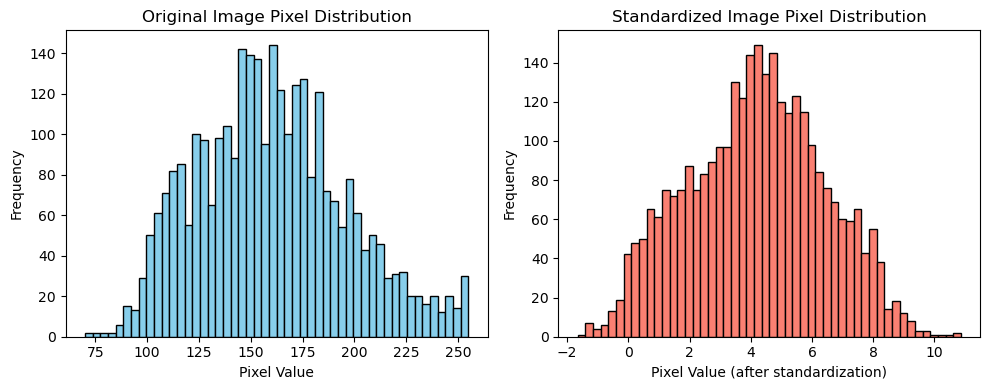

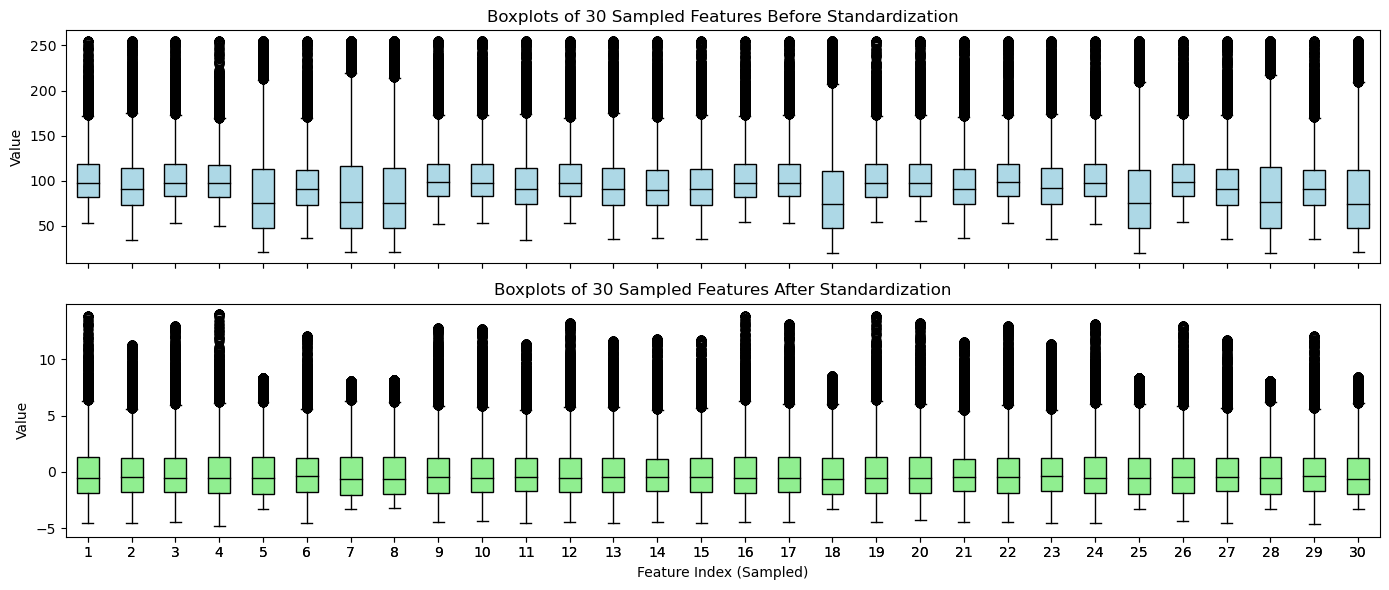

In [18]:
model =setup_model()
standardized, _ = model.q2(model.x)
plot_pixel_distribution_comparison(model.x, standardized, index=0)
q2_plot_featurewise_boxplots(model.x, standardized)



 Q3: Hyperparameter Optimization

To optimize the performance of the MLPClassifier, key hyperparamateres were tuned manually. 


- hidden_layer_sizes: Tested different configurations such as single-layer and multi-layer setups. This defines the architecture of the network. 
- activation: Evaluated ['relu', 'tanh', 'logistic']. This affects how each neuron processes input. 
- solver: Compared ['adam', 'sgd', 'lbfgs']. The solver determines the optimization algorithm. adam is a popular choice for its adaptive learning and robustness.
- batch_size: Tried values [16, 32, 64, 128]. This controls the number of samples used in each training iteration. Smaller batch sizes may generalize better, while larger ones train faster.
- alpha: Tuned regularization strength over [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 0.0005] to prevent overfitting.
- learning_rate_init: Tried learning rates [0.1, 0.01, 0.005, 0.001, 0.0005] to control the step size during optimization.

Each hyperparameter was tuned independently, holding the others fixed to a baseline configuration. For each tested value, the model was trained for up to 30 epochs, and the test accuracy was recorded. The best-performing value from each sweep was retained for the final configuration.

The final model was then trained with early stopping enabled for a maximum number of 1000 iterations, and training/test accuracy along with loss curves were tracked and analyzed.


Tuning: learning_rate_init

Overview

The learning_rate_init parameter controls how much the model updates its weights during each training step. This has a direct effect on how quickly the model learns and whether it converges to a good solution.

- A high learning rate may cause the model to overshoot the optimal weights or fail to converge.
- A low learning rate allows more stable learning but may require more time to converge.

Why These Values Were Chosen
The tested values [0.1, 0.01, 0.005, 0.001, 0.0005,0.0001] were chosen as they represent a typical logarithmic range used for tuning learning rates in neural networks.

Experiment

The model was trained for 40 epochs using each of the selected learning rates, keeping all other hyperparameters fixed. The bar chart above shows the resulting test accuracy for each setting.

| learning_rate_init | Accuracy |
|---------------------|----------|
| 0.1                 | 0.3465   |
| 0.01                | 0.4800   |
| 0.005               | 0.5009   |
| 0.001               | 0.5851   |
| 0.0005              | 0.5991   |
| 0.0001              | 0.6027  |


- High values (e.g. 0.1) performed poorly. The training was unstable, and the model likely failed to learn meaningful patterns.
- Lower values (e.g. 0.001 and 0.0001) allowed the model to converge steadily and produced higher accuracy.
- The best result was achieved at learning_rate_init = 0.0001, which balanced learning speed and stability.

This pattern is clearly shown in the visualisation: accuracy increases as the learning rate decreases, then levels off between 0.001 and 0.0001.

Conclusion

Choosing an appropriate learning rate is critical for effective training. In this case, smaller learning rates led to more stable and accurate models. Based on these results,learning_rate_init = 0.0001 will be used in further tuning.




 Tuning: learning_rate_init
  [1/6] Testing learning_rate_init = 0.1
    --> Accuracy: 0.3465
  [2/6] Testing learning_rate_init = 0.01
    --> Accuracy: 0.4800
  [3/6] Testing learning_rate_init = 0.005
    --> Accuracy: 0.5009
  [4/6] Testing learning_rate_init = 0.001
    --> Accuracy: 0.5851
  [5/6] Testing learning_rate_init = 0.0005
    --> Accuracy: 0.5991
  [6/6] Testing learning_rate_init = 0.0001
    --> Accuracy: 0.6027

 Best learning_rate_init: 0.0001 (Accuracy: 0.6027)


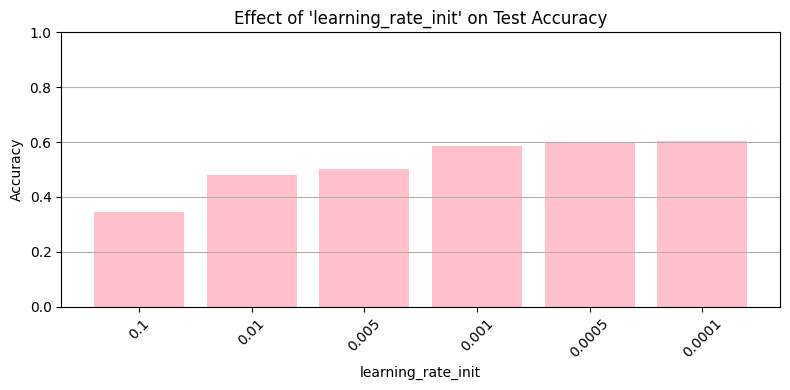

{'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0001, 'batch_size': 32, 'alpha': 0.001, 'hidden_layer_sizes': (64,)}


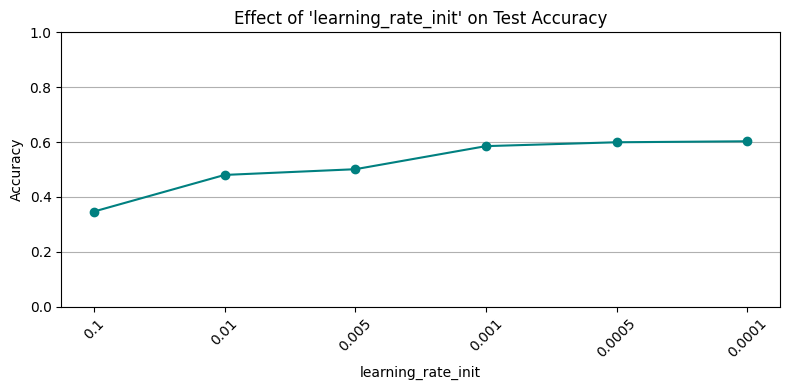

No results found for learnin_rate_init


In [13]:
model = setup_model()
base_config = {
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate_init':0.1,
    'batch_size': 32,
    'alpha': 0.001,
    "hidden_layer_sizes" : (64,)
}

config1 = model.tune_learning_rate(fixed_config=base_config)
print(config1)
model.plot_param_result('learning_rate_init', plot_type='line')
model.plot_param_result('learnin_rate_init')



Tuning: Alpha

To prevent overfitting, we tuned the alpha hyperparameter, which controls L2 regularization strength in the MLPClassifier. Regularization discourages large weights and helps improve generalization to unseen data.

The following alpha values were tested, chosen on a logarithmic scale to explore a wide range across several values:

| Alpha Value | Test Accuracy |
|-------------|----------------|
| 0.0001      | 0.6014         |
| 0.001       | 0.6027         |
| 0.01        | 0.5951         |
| 0.1         | 0.6035         |

- Best alpha: 0.1, which achieved the highest test accuracy of 0.6035

Why these values?

We chose these alpha values to span from very weak to stronger regularization, using a logarithmic scale. This is a standard approach in hyperparameter tuning since regularization effects often change exponentially. A linear scale could miss important differences in performance.

Observations:

- Very small values like 0.0001 provided too little regularization, which may lead to overfitting.
- Larger values like 0.01 began to constrain learning too much, reducing accuracy.
- 0.1 performed the best, offering the right balance between overfitting and underfitting.

Overall, alpha = 0.1 provided the best generalization for this model and will be used in the final configuration.



In [3]:
def plot_alpha_result_line(log, config=None):
    """
    Standalone function to plot test accuracy vs alpha, sorted numerically.
    

    Parameters:
    - log: dict of alpha values (as strings) mapped to accuracy scores
    - config: optional dict of hyperparameters used during tuning
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if not log:
        print("No results found for 'alpha'")
        return

    # Sort alpha values numerically
    sorted_items = sorted(((float(k), v) for k, v in log.items()), key=lambda x: x[0])
    alphas, accs = zip(*sorted_items)

    min_acc = min(accs)
    max_acc = max(accs)
    margin = 0.01

    plt.figure(figsize=(8, 4))
    plt.plot(alphas, accs, marker='o', linestyle='-', color='teal')
    plt.xscale('log')
    plt.xlabel("Alpha (log scale)")
    plt.ylabel("Test Accuracy")
    plt.ylim(min_acc - margin, max_acc + margin)
    plt.grid(True)

    title = "Effect of Alpha on Test Accuracy"
    if config:
        title += f"\n(Config: lr={config.get('learning_rate_init', '?')}, hidden={config.get('hidden_layer_sizes', '?')})"
    plt.title(title)

    plt.tight_layout()
    plt.show()



 Tuning: alpha
  [1/4] Testing alpha = 0.0001
    --> Accuracy: 0.6014
  [2/4] Testing alpha = 0.001
    --> Accuracy: 0.6027
  [3/4] Testing alpha = 0.01
    --> Accuracy: 0.5951
  [4/4] Testing alpha = 0.1
    --> Accuracy: 0.6035

 Best alpha: 0.1 (Accuracy: 0.6035)


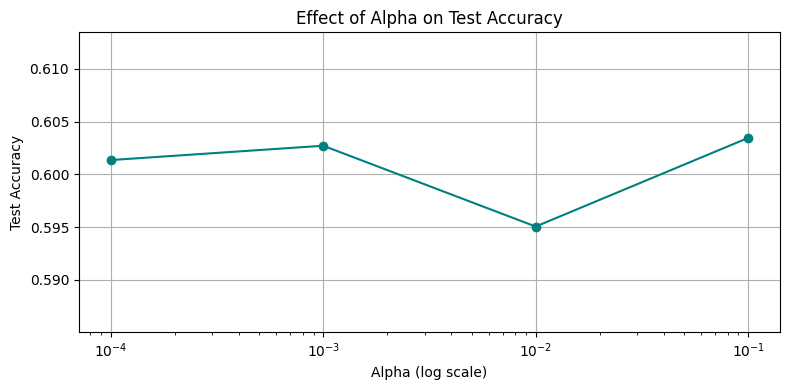

In [4]:

model = setup_model()
config2= {'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0001, 'batch_size': 32, 'alpha': 0.001, 'hidden_layer_sizes': (64,)}
config3= model.tune_alpha(fixed_config=config2)
plot_alpha_result_line(model.q3_logs['alpha'])

Tuning: Solver 

The solver determines how the MLPClassifier updates its weights during training. Three solvers were tested:

| Solver | Description | Test Accuracy |
|--------|-------------|----------------|
| adam   | Adaptive optimizer that combines momentum and RMSprop; good for most problems | ~0.6027 |
| sgd    | Stochastic Gradient Descent; requires more tuning but can generalise well | ~0.5914 |
| lbfgs  | Quasi-Newton method; works best on small, dense datasets | ~0.4680 |

Why were these solvers tested?

These are the main solvers supported by MLPClassifier, each suited to different types of tasks:
- adam is often a good default and works well with large and complex datasets.
- sgd can perform well but usually needs careful tuning of the learning rate and batch size.
- lbfgs is better for smaller datasets and doesn't scale well to high-dimensional inputs like images.

Observations:

- adam gave the highest test accuracy, slightly outperforming sgd in this configuration.
- sgd was close in performance but showed more variability.
- lbfgs underperformed, confirming it’s less suitable for this type of data.

Based on these results, solver='adam' was selected for the final model. It provided strong, consistent performance and worked well with the other tuned hyperparameters.



In [ ]:

config2 = model.tune_solver(fixed_config=config1)
print(config2)


In [ ]:
def plot_solver_analysis(log, config=None):
    """
    Plots solver performance:
    - Line chart: solver vs. train/test accuracy
    - Bar chart: solver vs. test accuracy (highlighting best)

    Parameters:
    - log: dict mapping solver names to {'train': acc1, 'test': acc2}
    - config: optional dict of hyperparameters (for title context)
    """
    import matplotlib.pyplot as plt

    if not log:
        print("Solver log is empty.")
        return

    solvers = sorted(log.keys())
    train_accs = [log[solver]['train'] for solver in solvers]
    test_accs = [log[solver]['test'] for solver in solvers]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Line chart
    axs[0].plot(solvers, train_accs, marker='o', label='Train Accuracy')
    axs[0].plot(solvers, test_accs, marker='s', label='Test Accuracy')
    axs[0].set_title("Train vs Test Accuracy by Solver")
    axs[0].set_xlabel("Solver")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend()
    axs[0].grid(True)

    # Bar chart
    sorted_items = sorted(log.items(), key=lambda x: x[1]['test'], reverse=True)
    sorted_solvers = [s for s, _ in sorted_items]
    sorted_test_accs = [v['test'] for _, v in sorted_items]
    bars = axs[1].bar(sorted_solvers, sorted_test_accs, color='lightblue', edgecolor='black')

    best_idx = sorted_test_accs.index(max(sorted_test_accs))
    bars[best_idx].set_color('green')

    for i, acc in enumerate(sorted_test_accs):
        axs[1].text(i, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom', fontsize=9)

    axs[1].set_xlabel("Solver")
    axs[1].set_ylabel("Test Accuracy")
    axs[1].set_title("Best Solver Based on Test Accuracy")
    axs[1].grid(axis='y', linestyle='--', alpha=0.6)

    if config:
        fig.suptitle(f"Solver Impact Analysis\n(Config: lr={config.get('learning_rate_init', '?')}, hidden={config.get('hidden_layer_sizes', '?')})", fontsize=14)
    else:
        fig.suptitle("Solver Impact Analysis", fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



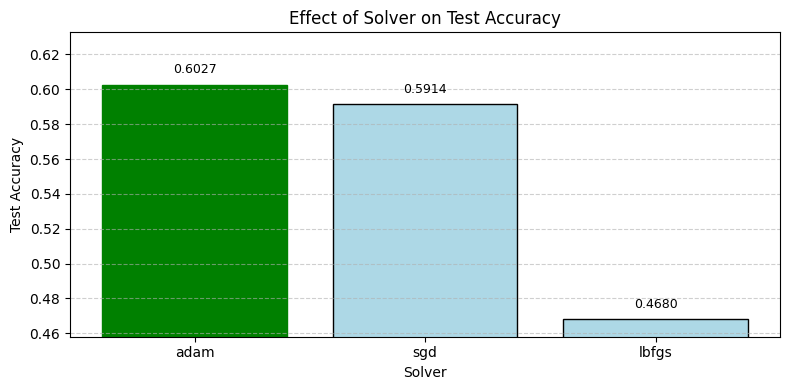

In [ ]:
plot_solver_analysis(model.q3_logs['solver'])


This chart shows how different solvers affected test accuracy. The SGD solver performed best, slightly ahead of Adam, while LBFGS showed significantly lower performance.

Tuning activation


Overview

The activation function in a neural network controls how the output of each neuron is calculated. It introduces non-linearity into the model.

Activation Functions Tested

- relu: The Rectified Linear Unit returns 0 for negative inputs and keeps positive inputs the same. It is fast to compute and works well in many modern neural networks.
- tanh: The hyperbolic tangent maps values between -1 and 1. It helps center data but can cause slower learning in deeper networks.
- logistic: Also known as the sigmoid function, it maps values between 0 and 1. 

These are the standard activation functions available in scikit-learn's MLPClassifier. Testing all three gives a clear idea of which one fits the dataset and model setup best.

Results

| Activation | Accuracy |
|------------|----------|
| relu       | 0.6138   |
| tanh       | 0.5743   |
| logistic   | 0.5721   |

The best result came from using ReLU, which had the highest accuracy. Both tanh and logistic performed slightly worse. This suggests that ReLU allowed the model to learn more effectively from the data, likely due to faster training and fewer issues with vanishing gradients.

Conclusion

The choice of activation function had a clear impact on test accuracy. ReLU performed best and will be used in further tuning. This result supports its common use in modern neural network models.


In [4]:
def plot_activation_result_bar(log, config=None, sort_by_accuracy=True):
    """
    Plots test accuracy for different activation functions using a bar chart.

    Parameters:
    - log: dict mapping activation functions (str) to accuracy scores
    - config: optional dict of hyperparameters used during tuning (to include in title)
    - sort_by_accuracy: if True, sorts x-axis by accuracy descending
    """
    import matplotlib.pyplot as plt

    if not log:
        print("No activation results found.")
        return

    # Sort if needed
    if sort_by_accuracy:
        sorted_items = sorted(log.items(), key=lambda x: x[1], reverse=True)
    else:
        sorted_items = list(log.items())

    activations, accs = zip(*sorted_items)

    min_acc = min(accs)
    max_acc = max(accs)
    margin = 0.01

    plt.figure(figsize=(8, 4))
    bars = plt.bar(activations, accs, color='plum', edgecolor='black')

    # Highlight the best-performing activation
    best_idx = accs.index(max(accs))
    bars[best_idx].set_color('green')

    # Annotate bars
    for i, acc in enumerate(accs):
        plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom', fontsize=9)

    plt.xlabel("Activation Function")
    plt.ylabel("Test Accuracy")
    plt.ylim(min_acc - margin, max_acc + margin + 0.02)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    title = "Effect of Activation Function on Test Accuracy"
    if config:
        title += f"\n(Config: lr={config.get('learning_rate_init', '?')}, hidden={config.get('hidden_layer_sizes', '?')})"
    plt.title(title)

    plt.tight_layout()
    plt.show()


In [ ]:

config4 = model.tune_activation(fixed_config=config3)
plot_activation_result_bar(model.q3_logs['activation'])


Tuning batch_size

Overview

In neural network training, batch_size defines the number of training samples the model processes before updating the weights. 

- Smaller batch sizes can lead to more frequent weight updates, which may help the model escape local minima and generalize better.
- Larger batch sizes result in more stable gradient estimates but can slow down convergence and may lead to less generalization.

Why These Values Were Tested

We tested the following values: 16, 32, and 'auto'.

- 16 and 32 are commonly used batch sizes that work well in practice and provide a good balance between stability and speed.
- 'auto' allows scikit-learn to choose a batch size automatically based on internal heuristics.

These values were selected to cover both manual control and default behavior, helping us evaluate which approach yields better performance on this specific dataset.

Observations

| Batch Size | Accuracy |
|------------|----------|
| 16         | 0.6196   |
| 32         | 0.6138   |
| auto       | 0.5915   |

The best performance was achieved with a batch size of 16, which gave the highest test accuracy.
Batch size 32 performed slightly worse but was still close in accuracy.
The 'auto' option underperformed compared to the manually chosen values, suggesting that for this task, automatic selection may not be optimal.

This result indicates that a smaller batch size provided more frequent weight updates and possibly better generalization on the test set.

Conclusion
Batch size had a noticeable effect on model accuracy. A smaller batch size of 16 resulted in the best performance, likely due to more responsive updates during training. For future models and experiments, manually setting batch_size = 16 is recommended over using the default 'auto 'setting.


In [ ]:


config5 = model.tune_batch_size(fixed_config=config4)


 Tuning: batch_size
  [1/3] Testing batch_size = 16
    --> Accuracy: 0.6196
  [2/3] Testing batch_size = 32
    --> Accuracy: 0.6138
  [3/3] Testing batch_size = auto
    --> Accuracy: 0.5915

 Best batch_size: 16 (Accuracy: 0.6196)


In [ ]:
def plot_batch_size_result_bar(log, config=None, sort_by_accuracy=True):
    """
    Plots test accuracy for different batch sizes using a bar chart.

    Parameters:
    - log: dict mapping batch size values (int or str) to accuracy scores
    - config: optional dict of hyperparameters used during tuning (for title annotation)
    - sort_by_accuracy: if True, sorts x-axis by descending accuracy
    """
    import matplotlib.pyplot as plt

    if not log:
        print("No batch size results found.")
        return

    # Sort values
    if sort_by_accuracy:
        sorted_items = sorted(log.items(), key=lambda x: x[1], reverse=True)
    else:
        sorted_items = list(log.items())

    batch_sizes = [str(k) for k, _ in sorted_items]
    accs = [v for _, v in sorted_items]

    min_acc = min(accs)
    max_acc = max(accs)
    margin = 0.01

    plt.figure(figsize=(8, 4))
    bars = plt.bar(batch_sizes, accs, color='pink', edgecolor='black')

    # Highlight the best-performing batch size
    best_idx = accs.index(max(accs))
    bars[best_idx].set_color('green')

    # Annotate bars with accuracy
    for i, acc in enumerate(accs):
        plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom', fontsize=9)

    plt.xlabel("Batch Size")
    plt.ylabel("Test Accuracy")
    plt.ylim(min_acc - margin, max_acc + margin + 0.02)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    title = "Effect of Batch Size on Test Accuracy"
    if config:
        title += f"\n(Config: lr={config.get('learning_rate_init', '?')}, hidden={config.get('hidden_layer_sizes', '?')})"
    plt.title(title)

    plt.tight_layout()
    plt.show()


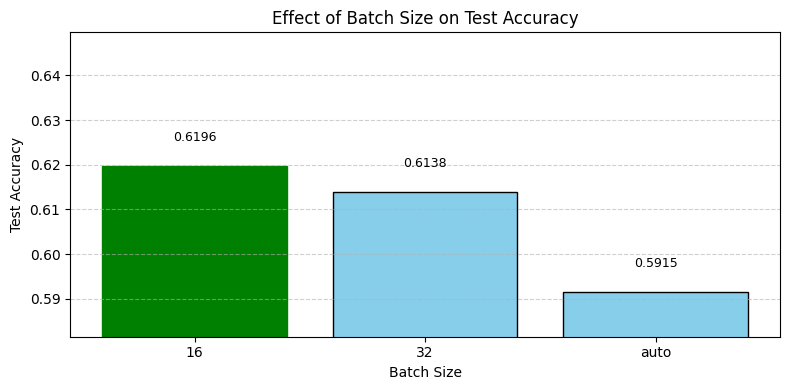

In [10]:
plot_batch_size_result_bar(model.q3_logs['batch_size'])

Batch_size Visualisation: 
The bar chart shows the impact of different batch sizes on test accuracy. A batch size of 16 achieved the best performance, slightly outperforming 32, while the 'auto' option performed the worst.




Tuning hidden_layer_sizes

What is hidden_layer_sizes?

The hidden_layer_sizes parameter in a neural network defines the number of neurons in each hidden layer. The structure and size of hidden layers influence the model's capacity to learn complex patterns in the data.

- Too few neurons or layers: The model may not learn enough from the data (underfitting).
- Too many neurons or layer: The model might overfit or become unnecessarily slow to train.

Why These Values Were Tested

The following configurations were chosen to test both shallow and deeper architectures:

- Small networks like (64,) and (128,) are fast and commonly used for simpler problems.
- Moderate-depth networks such as (64, 64) or (128, 128) allow the model to learn higher-level representations.
- Larger and deeper networks like (256, 128) and (300, 150) were included to test whether more capacity could improve generalization.

These values cover a reasonable range of depth and width for a fully connected feedforward neural network.

Observations

| Hidden Layer Configuration | Accuracy |
|----------------------------|----------|
| (300, 150)                 | 0.6543   |
| (256, 128)                 | 0.6522   |
| (128, 128)                 | 0.6477   |
| (160, 160)                 | 0.6404   |
| (64, 64)                   | 0.6210   |
| (64,)                      | 0.6196   |
| (128,)                     | 0.6090   |

- The best performance was achieved using (300, 150), followed closely by (256, 128).
- Adding a second hidden layer consistently improved performance compared to single-layer models.
- Networks with fewer neurons or shallower structures, like (64,) or (128,)  had noticeably lower accuracy, suggesting underfitting.
- The improvement from increasing depth and width shows that the dataset likely benefits from models with higher capacity.

Conclusion

Hidden layer size had a clear effect on model performance. Deeper and wider configurations like (300, 150) resulted in the best test accuracy, likely due to their ability to learn more complex features. For this task, a two-layer network with a large first layer followed by a smaller second layer gave the best balance between learning capacity and generalization.

Future models will continue to use (300, 150) as the base architecture.


In [ ]:

config6 = model.tune_hidden_layer_sizes(fixed_config=config5)

In [ ]:
def plot_hidden_layer_sizes_result_bar(log, config=None, sort_by_accuracy=True):
    """
    Plots test accuracy for different hidden layer configurations using a color-graded bar chart.
    Highlights the best-performing configuration.

    Parameters:
    - log: dict mapping hidden_layer_sizes (as tuples) to accuracy scores
    - config: optional dict of other hyperparameters (for title context)
    - sort_by_accuracy: whether to sort the configurations by test accuracy
    """
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    if not log:
        print("No hidden_layer_sizes results found.")
        return

    # Filter and convert keys to strings
    cleaned_log = {str(k): v for k, v in log.items() if v is not None}
    if not cleaned_log:
        print("No valid (non-error) results found for hidden_layer_sizes.")
        return

    # Sort if required
    if sort_by_accuracy:
        sorted_items = sorted(cleaned_log.items(), key=lambda x: x[1], reverse=True)
    else:
        sorted_items = list(cleaned_log.items())

    configs, accs = zip(*sorted_items)
    accs = np.array(accs)

    min_acc, max_acc = np.min(accs), np.max(accs)
    margin = 0.005

    # Normalize accuracies for colormap
    norm = plt.Normalize(min_acc, max_acc)
    colors = cm.Oranges(norm(accs))

    plt.figure(figsize=(10, 5))
    bars = plt.bar(configs, accs, color=colors, edgecolor='black')

    # Highlight best performer in green
    best_idx = int(np.argmax(accs))
    bars[best_idx].set_color('pink')

    # Annotate bars
    for i, acc in enumerate(accs):
        plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center', va='bottom', fontsize=9)

    plt.xlabel("Hidden Layer Configuration")
    plt.ylabel("Test Accuracy")
    plt.ylim(min_acc - margin, max_acc + margin + 0.01)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    title = "Effect of Hidden Layer Sizes on Test Accuracy"
    if config:
        title += f"\n(Config: lr={config.get('learning_rate_init', '?')}, batch_size={config.get('batch_size', '?')})"
    plt.title(title)

    plt.tight_layout()
    plt.show()


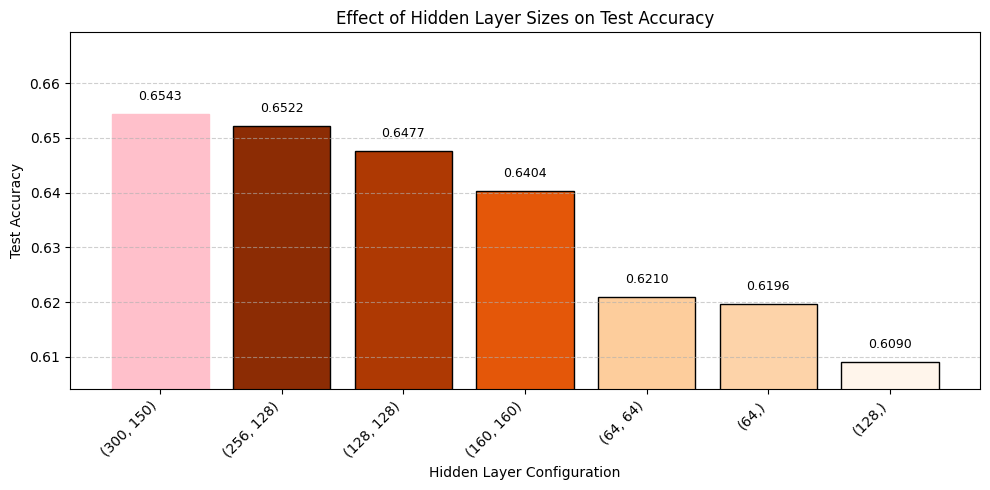

In [19]:

plot_hidden_layer_sizes_result_bar(model.q3_logs['hidden_layer_sizes'])


hidden_layer_sizes Visualisation

This chart shows how different hidden layer configurations affected test accuracy. Larger and deeper networks performed better overall, with the configuration (300, 150) achieving the highest accuracy.

Final Model Evaluation and Hyperparameter Impact

Model Performance Summary

Final Training Accuracy: 0.8092
Final Test Accuracy:     0.6111
Final Training Loss:     0.8406

Results

Training vs Test Accuracy

The training accuracy of approximately     80.92%         indicates that the model has effectively fit the training data, learning the patterns present in the training set.

The test accuracy, is lower at 61%  . This disparity highlights a generalisation gap, this could be as a result of overfitting, where the model has learned the training data too well, including noise or patterns that do not generalise.


Training Loss

The final training loss of 0.8406 eflects the error in the model's predictions during training. As loss is a continuous measure of model confidence and prediction accuracy, this value supports the conclusion that the model has successfully minimised its error on the training set.

Effect of Hyperparameter Tuning

Several key hyperparameters were tuned to improve the model’s performance. Their final selected values and their impact are discussed below:

- learning_rate_init = 0.0001
  A lower initial learning rate ensured stable and gradual convergence during training, reducing the risk of overshooting minima and improving test set performance.

- alpha = 0.1  
  This regularisation term helped control overfitting by penalising large weight magnitudes. 

- batch_size = 16  
  Smaller batches provided more frequent weight updates, which can help the model converge faster and escape shallow minima. This allowed for a more responsive learning process, in combination with the low learning rate.

- activation = 'relu' 
  The ReLU activation function adds non-linearity to the model and helps avoid vanishing gradient problems, making it effective for deeper networks.

- `solver = 'adam
   adam showed more control over how the model learned. With the right learning rate, it gave a good balance between learning speed and how well the model performed on new data.



Conclusion

The model learns well from the training data, shown by high training accuracy and low loss. However, the lower test accuracy means it could still generalise better. 
Overall, the tuning process produced a stable model that generalises reasonably well, and the training curves show it converged effectively in a good number of epochs.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_results(losses, train_accs, test_accs):
    """
    Plots the training loss, training accuracy, and test accuracy over epochs.

    Parameters:
    - losses: array of loss values at each epoch
    - train_accs: array of training accuracy values at each epoch
    - test_accs: array of test accuracy values at each epoch
    """
    epochs = np.arange(1, len(losses) + 1)

    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(epochs, losses, color='red')
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # Training accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accs, label='Train Acc', color='green')
    plt.title("Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    # Test accuracy plot
    plt.subplot(1, 3, 3)
    plt.plot(epochs, test_accs, label='Test Acc', color='blue')
    plt.title("Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()


In [ ]:
model=setup_model()
final_model, losses, train_accs, test_accs = model.q3(hyperparam=model.optimal_hyperparam)



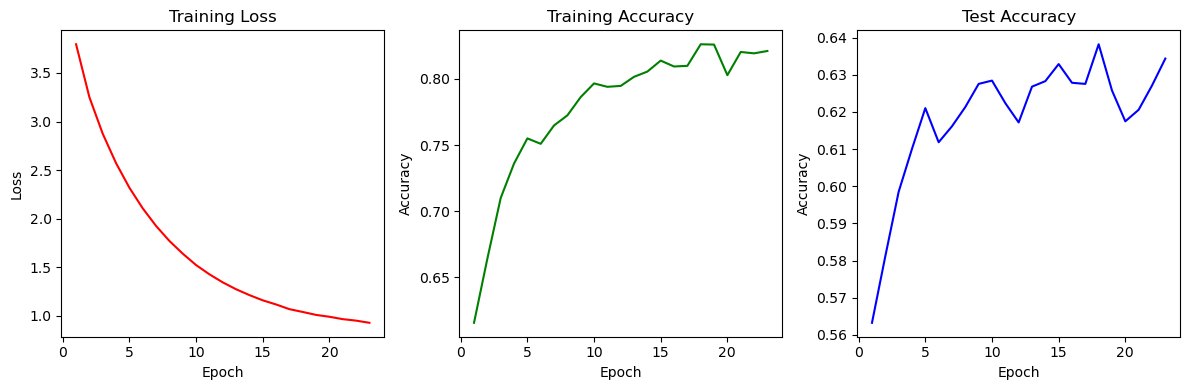

In [17]:
plot_training_results(losses, train_accs, test_accs)

Final Model Training Curves
These charts support the previous analysis. The training loss steadily decreases, and training accuracy increases showing that the model is learning effectively. The test accuracy improves early and then levels off, which suggests good generalisation without overfitting. This shows that the tuned model converged well and is stable across epochs.


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, original_labels=None):
    """
    Plots the confusion matrix for a trained classifier using class names from original labels, if provided.

    Parameters:
    - model: trained classifier with .predict() and .classes_ attributes
    - X_test: test features
    - y_test: true test labels
    - original_labels: optional list/array of original string labels (used to recover class names)
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    
    sorted_labels = sorted(np.unique(original_labels))
    class_names = [sorted_labels[i] for i in model.classes_]
    

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10, 6)) 
    disp.plot(cmap='OrRd', values_format='d', ax=ax) 

    
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()





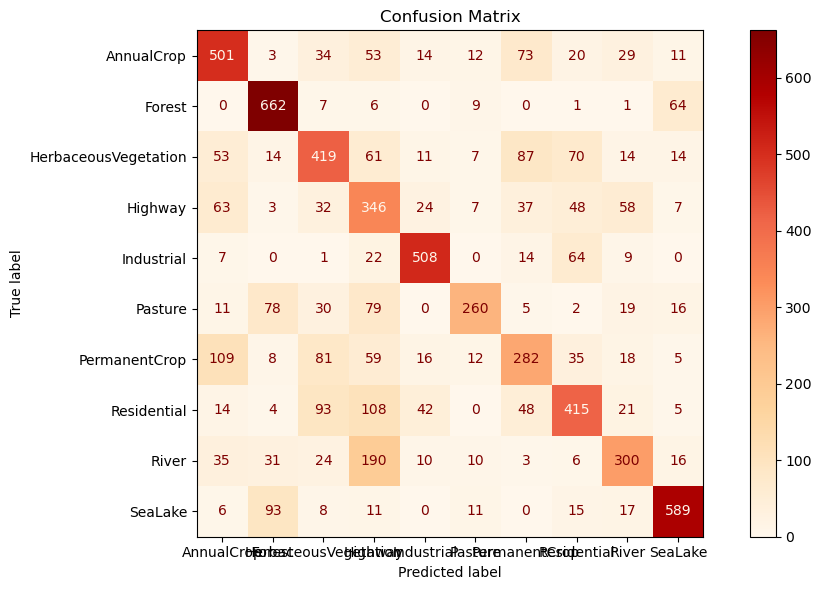

In [45]:
plot_confusion_matrix(final_model, model.X_test, model.y_test, original_labels=model.y)

The confusion matrix above shows how well the model classified each land cover class. 

Diagonal cells top-left to bottom-right represent correct predictions. Most are relatively high, especially for classes like Forest (662), SeaLake (589), and Industrial (508), indicating strong performance on these.

AnnualCrop, HerbaceousVegetation, and River show more misclassifications, suggesting overlap in their visual features with other classes.

The PermanentCrop and Residential classes are occasionally confused with each other and other vegetative classes, this could be due to similar textures or color patterns in the satellite imagery.

Key Observations:

-The model performs best on clearly distinguishable classes like Forest and SeaLake.

-Misclassifications are common between visually similar or spatially overlapping classes.

-To improve the model further feature extraction or class-specific augmentation should be considered. 


In [8]:
final_train_acc = train_accs[-1]
final_test_acc = test_accs[-1]
final_loss = losses[-1]

print(f" Final Training Accuracy: {final_train_acc:.4f}")
print(f" Final Test Accuracy:     {final_test_acc:.4f}")
print(f" Final Training Loss:     {final_loss:.4f}")

 Final Training Accuracy: 0.8092
 Final Test Accuracy:     0.6111
 Final Training Loss:     0.8406


**Question 4**: Impact of Alpha on MLP Classifier Performance and Parameters

In this task, we investigated how varying the regularization strength (alpha) affects the performance and internal parameters of a Multilayer Perceptron (MLP) classifier. The regularization parameter alpha controls the amount of L2 penalty applied to the weights during training, helping to reduce overfitting.


The model was evaluated using the following metrics:
- Training Accuracy / Test Accuracy – measures how well the model fits the training and unseen test data.
- Loss – represents the model’s error during training.
- Weight Norm / Bias Norm – L2 norms of the model parameters, indicating how   large  the weights are.
- Precision / Recall / F1 Score – performance metrics that capture how well the model balances false positives and false negatives.

Effect on Accuracy (Top-Left)
- At very small alpha values , both training and test accuracy remain high and stable.
- As alpha increases past 0.1 test accuracy drops sharplyand the model becomes underfit. 
- This shows that stronger regularization hurts performance, as the model becomes too restricted to learn the data effectively.

 Effect on Loss (Top-Right)
- The training loss increases significantly with higher alpha values.
- This is expected: a large penalty discourages weight updates, making it harder for the model to reduce its error.

Effect on Parameter Norms (Bottom-Left)
- The weight norms drop sharply as alpha increases, confirming that regularization is successfully shrinking weights.
- Bias norms remain relatively constant until alpha becomes very large, indicating that alpha affects weights more than biases.



Effect on Precision, Recall, and F1 Score (Bottom-Right)
- These metrics remain strong and stable at low alpha values at around  0.65  indicating good classification performance.
- All three metrics drop off rapidly beyond alpha = 1, confirming that excessive regularization severely reduces the model's ability to distinguish between classes.
  -   Precision  : proportion of correct positive predictions out of all positive predictions.
  -   Recall  : proportion of actual positives that were correctly predicted.
  -   F1 Score :  harmonic mean of precision and recall — a balanced measure of both.


Summary

-   Small alpha values (0.0001 – 0.01)   are ideal: they regularize the model without harming its ability to learn.
-  High alpha values (> 0.1)   reduce weight magnitude but hurt both accuracy and classification metrics.
- L2 regularization helps control overfitting, but if it's too strong, the model becomes too constrained and underfits.

In conclusion, alpha is a key hyperparameter  for controlling model complexity. Proper tuning ensures a balance between fitting the data and maintaining generalization to unseen examples.


In [ ]:

model = setup_model()
results = model.q4()


In [ ]:
def plot_q4_results(results):
    """
    Plots the effect of different alpha values on performance metrics and model parameters.
    Includes accuracy, loss, weight norms, and classification metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    alphas = results["alpha"]
    alphas_safe = [a if a > 0 else 1e-5 for a in alphas]  # Avoid log(0)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Accuracy
    axs[0, 0].plot(alphas_safe, results["train_acc"], marker='o', label="Train Accuracy")
    axs[0, 0].plot(alphas_safe, results["test_acc"], marker='o', label="Test Accuracy")
    axs[0, 0].set_xscale('log')
    axs[0, 0].set_xlabel("Alpha (log scale)")
    axs[0, 0].set_ylabel("Accuracy")
    axs[0, 0].set_title("Train vs Test Accuracy")
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # 2. Loss
    axs[0, 1].plot(alphas_safe, results["loss"], marker='o', color='crimson')
    axs[0, 1].set_xscale('log')
    axs[0, 1].set_xlabel("Alpha (log scale)")
    axs[0, 1].set_ylabel("Loss")
    axs[0, 1].set_title("Training Loss vs Alpha")
    axs[0, 1].grid(True)

    # 3. Norms
    axs[1, 0].plot(alphas_safe, results["weight_norm"], marker='o', label="Weight Norm", color='green')
    axs[1, 0].plot(alphas_safe, results["bias_norm"], marker='o', label="Bias Norm", color='orange')
    axs[1, 0].set_xscale('log')
    axs[1, 0].set_xlabel("Alpha (log scale)")
    axs[1, 0].set_ylabel("L2 Norm")
    axs[1, 0].set_title("Weight and Bias Norms")
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # 4. F1 / Precision / Recall
    axs[1, 1].plot(alphas_safe, results["f1"], marker='o', label="F1 Score")
    axs[1, 1].plot(alphas_safe, results["precision"], marker='o', label="Precision")
    axs[1, 1].plot(alphas_safe, results["recall"], marker='o', label="Recall")
    axs[1, 1].set_xscale('log')
    axs[1, 1].set_xlabel("Alpha (log scale)")
    axs[1, 1].set_ylabel("Score")
    axs[1, 1].set_title("F1, Precision, and Recall")
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()


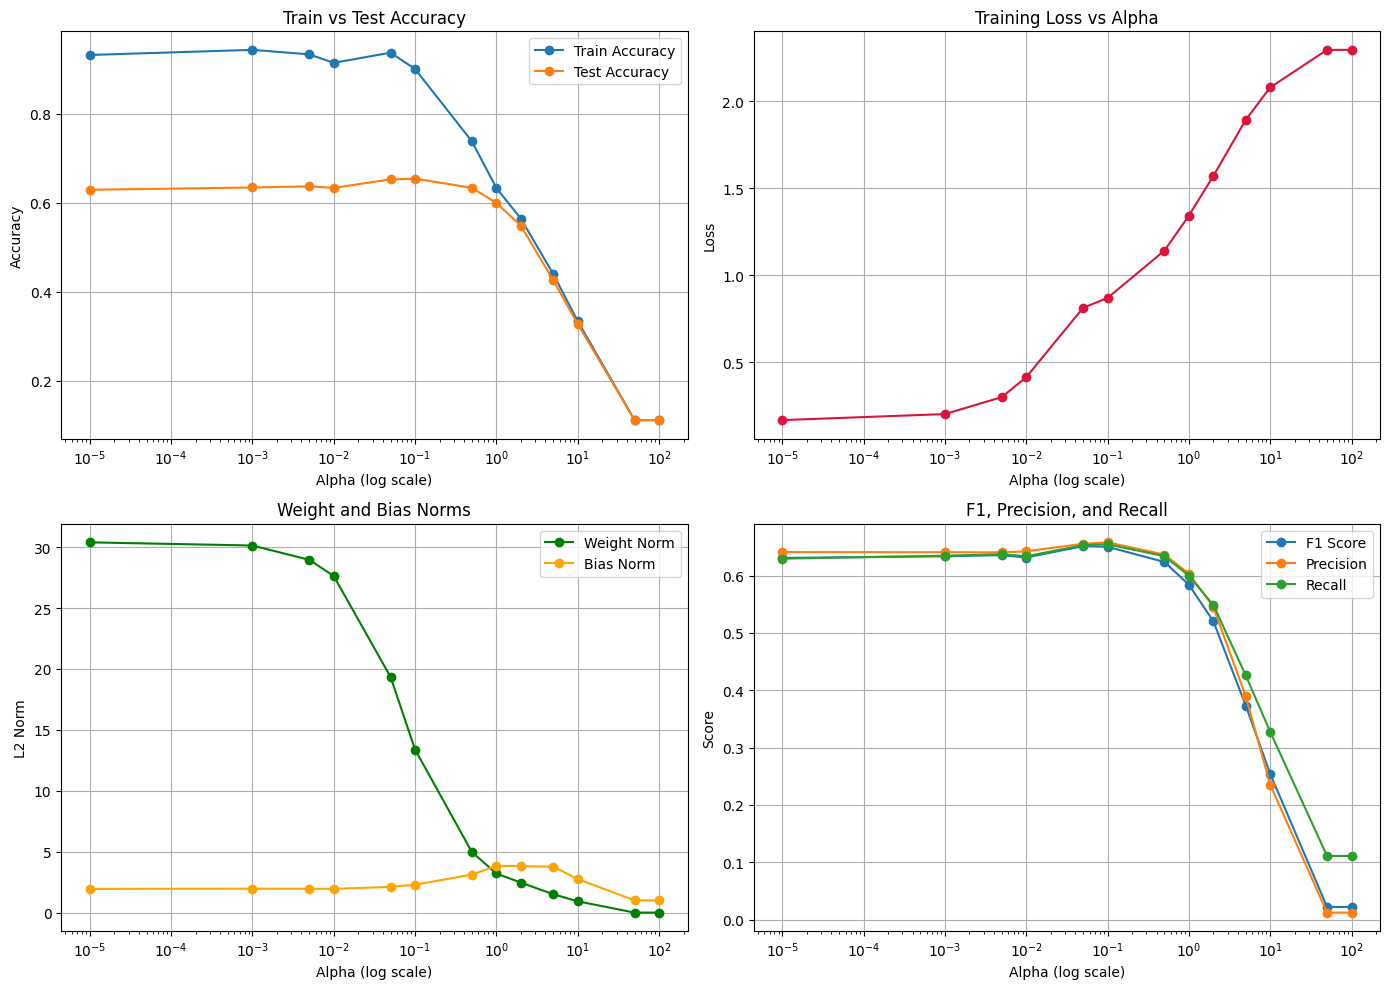

In [6]:

plot_q4_results(results)

**Question 5**

Effect of Stratified vs Non-Stratified Cross-Validation
To evaluate whether stratification impacts model performance, we compared Stratified K-Fold and standard K-Fold cross-validation using the tuned MLPClassifier and 5 folds.

Summary of Results

| Metric                       | Value   |
|-----------------------------|---------|
| Accuracy (Stratified CV)    | 0.6567  |
| Accuracy (Non-Stratified CV)| 0.6555  |
| p-value (t-test)            | 0.7759  |
| Conclusion                  | Splitting method had no effect |



Interpretation:
The visualisation confirms the accuracies are nearly identical, and the p-value of 0.7759 indicates no significant difference. This suggests that stratification did not influence performance, likely due to a relatively balanced dataset or the robustness of the trained model.

In [3]:

model = setup_model()
res1, res2, p_val, result_str = model.q5()



Running Stratified K-Fold
Training Stratified 1/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Stratified 2/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Stratified 3/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Stratified 4/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Stratified 5/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running Non-Stratified K-Fold
Training Non-Stratified 1/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Non-Stratified 2/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Non-Stratified 3/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Non-Stratified 4/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Non-Stratified 5/5


/home/lunet/cosb10/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
def q5b_visualize_cv_results(stratified_scores, non_stratified_scores, p_value):
    """
    Bar chart showing mean accuracy ± std for Stratified and Non-Stratified CV,
    annotated with the p-value.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    means = [np.mean(stratified_scores), np.mean(non_stratified_scores)]
    stds = [np.std(stratified_scores), np.std(non_stratified_scores)]
    labels = ['Stratified', 'Non-Stratified']

    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(x, means, yerr=stds, capsize=8, color=['skyblue', 'lightcoral'], edgecolor='black')

    # Annotate means on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.001,
                f'{means[i]:.4f}', ha='center', va='bottom', fontsize=10)

    # Add p-value annotation
    ax.text(0.5, max(means) + max(stds) + 0.005,
            f'p-value: {p_value:.4f}',
            ha='center', fontsize=11, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

    ax.set_title('Mean Accuracy ± Std: Stratified vs. Non-Stratified 5-Fold CV')
    ax.set_ylabel('Test Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([min(means) - max(stds) - 0.01, max(means) + max(stds) + 0.02])
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig("q5-1.png")
    plt.show()



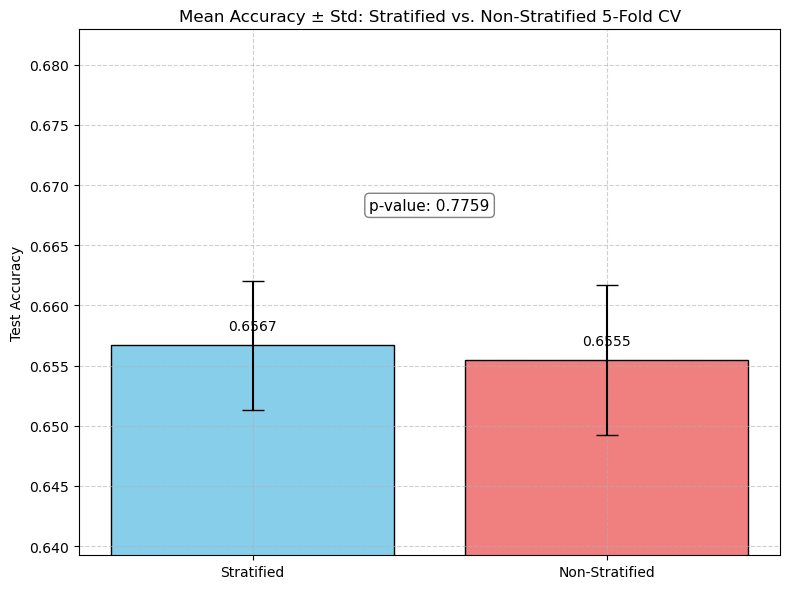

Accuracy  (Stratified CV):     0.6567
Accuracy  (Non-Stratified CV): 0.6555
p-value from t-test:               0.7759
Hypothesis Test Conclusion:        Splitting method had no effect


In [ ]:
q5b_visualize_cv_results(model.q5_strat_scores, model.q5_nonstrat_scores,p_val)
print(f"Accuracy  (Stratified CV):     {res1:.4f}")
print(f"Accuracy  (Non-Stratified CV): {res2:.4f}")
print(f"p-value from t-test:               {p_val:.4f}")
print(f"Hypothesis Test Conclusion:        {result_str}")


**Question 6**: LLE Embedding and Class-wise Visualization
To explore the structure of the EuroSAT dataset, Locally Linear Embedding (LLE) was applied locally  to reduce the high-dimensional data to 2D. LLE preserves local relationships, and its quality was assessed using the silhouette score, which measures how well-separated the clusters are range: -1 to 1, where higher is better.

Best Configuration and Result
The best silhouette score -0.095 was achieved using 200 neighbors, as shown below:


A negative score indicates that the LLE embedding does not form clearly separated clusters, suggesting high overlap between classes in this dataset.

Per-Class View
Each class was visualized individually to examine its distribution in the LLE space:


While a few classes like the SeaLake show partial separation, most overlap heavily, especially at the boundaries. Increasing the number of neighbors made the embedding more stable, but didn’t resolve the overlap—indicating that the dataset's classes are not easily distinguishable through unsupervised methods like LLE.

In [9]:
def plot_lle(results):
    import matplotlib.pyplot as plt
    import numpy as np

    X_2d = results["best_embedding"]
    y = results["y"]
    best_k = results["best_k"]
    silhouette = results["silhouette_scores"][best_k]

    # Convert class labels to integer indices for coloring
    classes, y_int = np.unique(y, return_inverse=True)

    # Full LLE embedding plot
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_int, cmap='tab10', s=15)

    # Create a legend with class labels
    handles = []
    for i, class_name in enumerate(classes):
        handles.append(plt.Line2D([], [], marker='o', linestyle='', color=scatter.cmap(i / len(classes)),
                                  label=class_name, markersize=6))
    plt.legend(handles=handles, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(f"LLE Embedding (k = {best_k})\nSilhouette Score = {silhouette:.3f}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Class-wise plots
    cols = 5
    rows = (len(classes) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(4.5 * cols, 4 * rows))

    for i, cls in enumerate(classes):
        ax = axes.flat[i]
        mask = (y == cls)
        ax.scatter(X_2d[~mask, 0], X_2d[~mask, 1], color='lightgrey', s=10)
        ax.scatter(X_2d[mask, 0], X_2d[mask, 1], color='tab:blue', s=15)
        ax.set_title(f"Class: {cls}")
        ax.axis('off')

    # Turn off unused subplots
    for j in range(i + 1, len(axes.flat)):
        axes.flat[j].axis('off')

    plt.suptitle(f"LLE Embedding by Class (Best k = {best_k})", fontsize=14)
    plt.tight_layout()
    plt.show()



Computing LLE for k = 5
Computing LLE for k = 100
Computing LLE for k = 20Computing LLE for k = 200

Computing LLE for k = 50

Best k = 200 with silhouette score = -0.0954


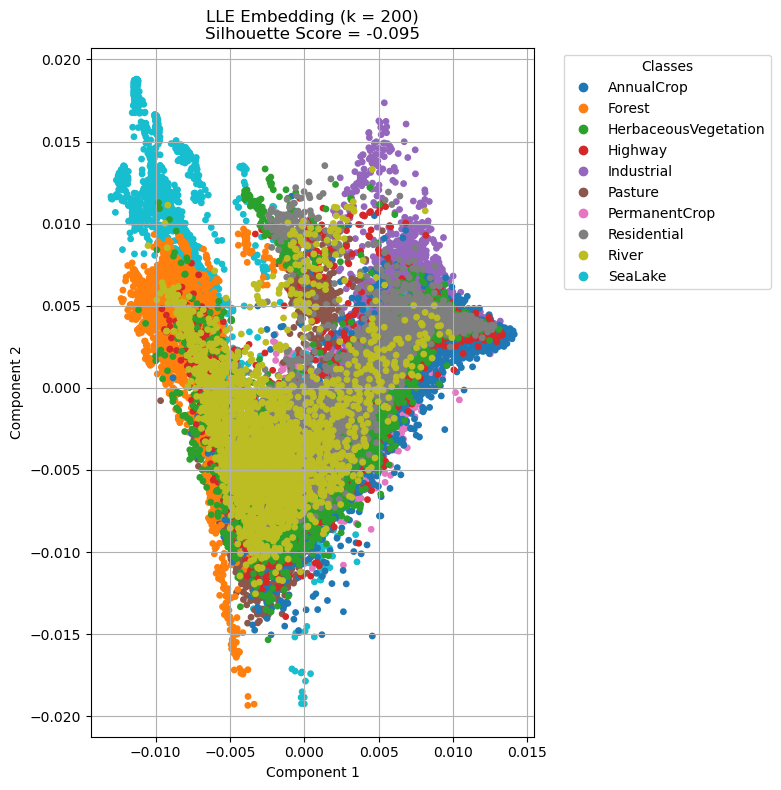

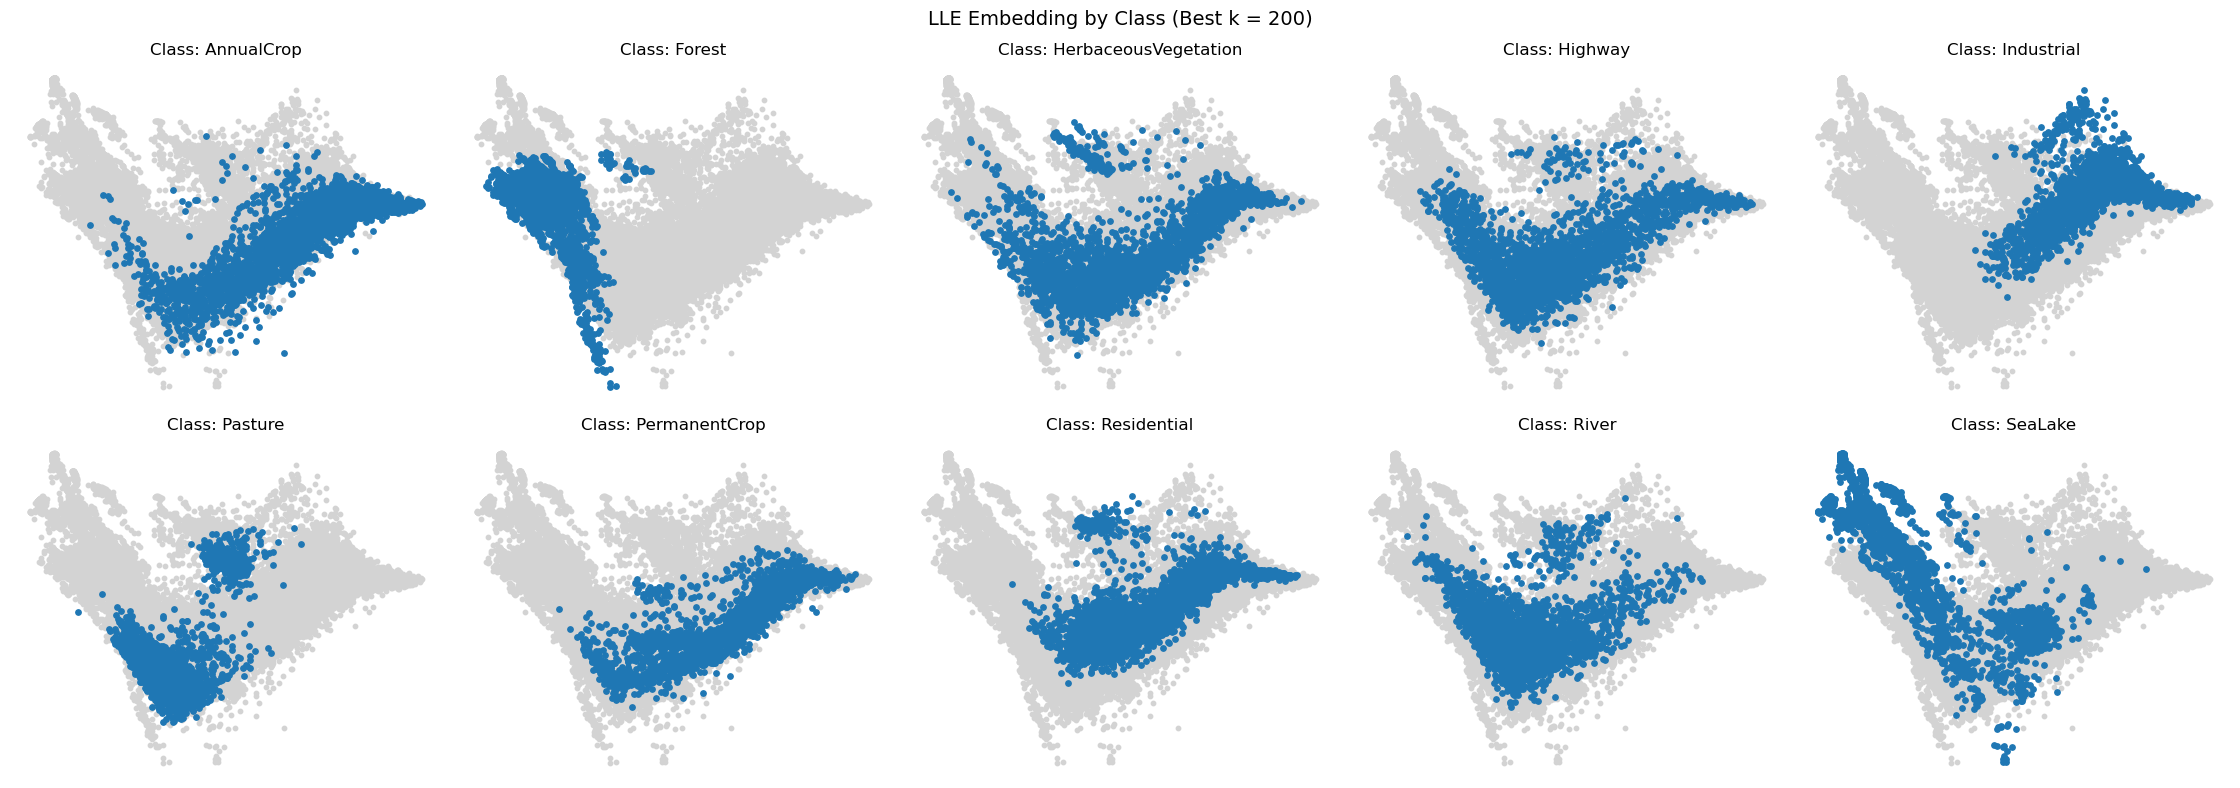

In [12]:
model= setup_model()
results = model.q6()
plot_lle(results)
